In [2]:
from netCDF4 import Dataset
import numpy as np

In [3]:
my_example_nc_file = 'timeAvgMap.M2IMNXINT_5_12_4_TQV.20170301-20220331.77E_31N_80E_34N.nc'
fh = Dataset(my_example_nc_file, mode='r')

print(fh.variables.keys())

dict_keys(['M2IMNXINT_5_12_4_TQV', 'lat', 'lat_bnds', 'lon', 'lon_bnds'])


In [4]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
lon_bnds = fh.variables['lon_bnds'][:]
lat_bnds = fh.variables['lat_bnds'][:]
p = fh.variables['M2IMNXINT_5_12_4_TQV'][:]

#datamonth = fh.variables['datamonth'][:]

#p = fh.variables['TQV'][:]

p_units = fh.variables['M2IMNXINT_5_12_4_TQV'].units

78.75 33.0


C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_23252/1551335516.py:22: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = m.pcolor(xi,yi,np.squeeze(p))


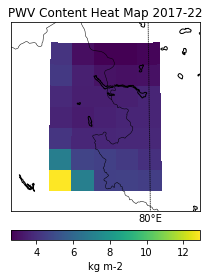

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

print(lon_0,lat_0)

m = Basemap(width=500000,height=500000,
            resolution='h',projection='stere',
            lat_ts=10,lat_0=lat_0,lon_0=lon_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(p))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(mappable=None, location='bottom', pad="10%")
cbar.set_label(p_units)

# Add Title
plt.title('PWV Content Heat Map 2017-22')

plt.show()